In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('../input/wakanda-forever-teaser-youtube-comments-data/Wakanda Forever Teaser_Youtube Comment.csv')
df.head()

,Unnamed: 0,Name,Comments,Likes,Replies,Published
0,0,SyrebralVibes,"Loved the transition from ""No Woman No Cry"" to...",53K,323 replies,4 days ago
1,1,Jackson Ferrao,Its so amazing to see how memorable Black Pant...,832,13 replies,10 hours ago (edited)
2,2,Christina L.,"Whoever did this teaser needs a raise, this is...",1.4K,23 replies,12 hours ago
3,3,Christopher Nunn,There’s an indescribable energy to this traile...,231,6 replies,7 hours ago
4,4,Parle - G Mama Ajith Uncle🤣,“I am queen of the most powerful nation in the...,706,9 replies,9 hours ago


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3071 non-null   int64 
 1   Name        3071 non-null   object
 2   Comments    3062 non-null   object
 3   Likes       3071 non-null   object
 4   Replies     3071 non-null   object
 5   Published   3071 non-null   object
dtypes: int64(1), object(5)
memory usage: 144.1+ KB


In [4]:
int_likes = []

for i in df['Likes'] : 
    if 'K' in i : 
        int_likes.append(int(i.replace('K', '').replace('.', '')) * 1000)
    else : 
        int_likes.append(int(i))
        
df['Likes'] = int_likes

In [5]:
df['Replies'] = df['Replies'].str.replace('replies', '').str.replace('reply', '').astype(int)

In [6]:
df.head(10).sort_values(by = 'Likes', ascending = False)
# df.info()

,Unnamed: 0,Name,Comments,Likes,Replies,Published
0,0,SyrebralVibes,"Loved the transition from ""No Woman No Cry"" to...",53000,323,4 days ago
6,6,Jung Eirini,The trembling and the intensity in the voice o...,33000,38,1 day ago
2,2,Christina L.,"Whoever did this teaser needs a raise, this is...",14000,23,12 hours ago
1,1,Jackson Ferrao,Its so amazing to see how memorable Black Pant...,832,13,10 hours ago (edited)
4,4,Parle - G Mama Ajith Uncle🤣,“I am queen of the most powerful nation in the...,706,9,9 hours ago
7,7,Horror Muppet,I've been wanting to see Namor hit this big sc...,364,11,13 hours ago
3,3,Christopher Nunn,There’s an indescribable energy to this traile...,231,6,7 hours ago
8,8,Blood Clover,"I love the execution of this teaser, super imp...",153,1,13 hours ago
5,5,John Sanchez,Hands down one of the best teaser trailers I’v...,147,3,4 hours ago
9,9,djnkosi,No hyperbole: this may be the greatest trailer...,25,1,9 hours ago


In [7]:
minmax = MinMaxScaler()
int_df = df.loc[:, ['Likes', 'Replies']]
int_df[['Likes', 'Replies']] = minmax.fit_transform(int_df[['Likes', 'Replies']])


<AxesSubplot:xlabel='Likes', ylabel='Replies'>

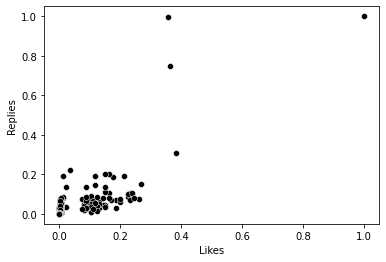

In [8]:
sns.scatterplot(x = 'Likes', y = 'Replies', data = int_df, color = 'black')

In [9]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for v in df['Comments']:
    # split the value
    tokens = str(v).split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "

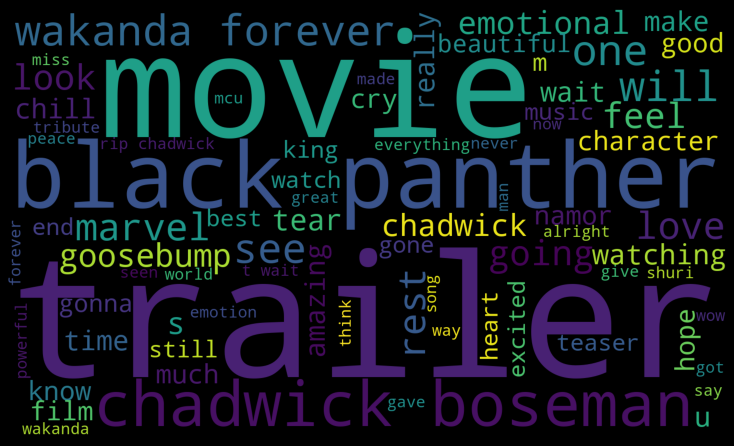

In [10]:
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 20,
                max_font_size= 500,
                scale = 1.5).generate(comment_words)

plt.figure(figsize = (10, 6), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [11]:
top_100Likes = df.nlargest(100, 'Likes')
top_100Likes

,Unnamed: 0,Name,Comments,Likes,Replies,Published
34,34,The Canadian Lad,Chadwick Boseman is the reason we're where we ...,146000,433,4 days ago
2580,2580,Garrett Watts,I am typing this with a tear drop on my screen...,56000,133,4 days ago
0,0,SyrebralVibes,"Loved the transition from ""No Woman No Cry"" to...",53000,323,4 days ago
1379,1379,Popular Music,Most Emotional Trailer ever. Let's make this m...,52000,431,3 days ago
87,87,WesleyTRV // Wesley Vianen,"""Death is not the end.""\n ...",39000,66,3 days ago (edited)
...,...,...,...,...,...,...
774,774,StridingSpark,What a trailer man. Didn't expect it to make m...,970,10,4 days ago
562,562,jcanthony16,"Beautiful , emotional poignant trailer. The ch...",959,6,3 days ago (edited)
685,685,VIBE MX,Just when I was getting concerned that Marvel ...,950,5,3 days ago
370,370,vinitj,"""My entire family is gone. Have I not given ev...",929,12,2 days ago


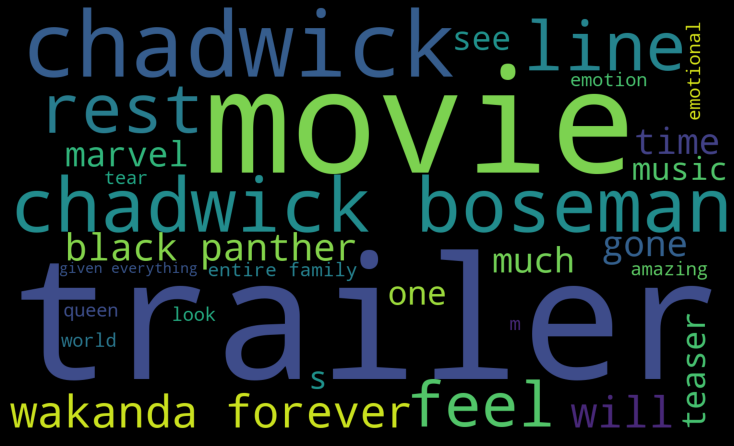

In [12]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for v in top_100Likes['Comments']:
    # split the value
    tokens = str(v).split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 20,
                max_font_size= 500,
                scale = 1.5).generate(comment_words)

plt.figure(figsize = (10, 6), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()